# catplot

При рассмотрении примеров работы библиотеки seaborn, нам также понадобятся библиотеки matplotlib, pandas и numpy.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
%config InlineBackend.figure_format = 'svg'

Данный код позволяет отображать графики в формате SVG (Scalable Vector Graphics), то есть в формате векторной графики. SVG основан на векторах, и это означает, что изображения состоят из линий и форм, а не пикселей. Это позволяет масштабировать изображения без потери качества.

Функция `sns.catplot()` (categorical plot) служит универсальным инструментом для создания различных типов графиков, предназначенных для визуализации категориальных данных. С использованием функции `sns.catplot()` можно построить такие диаграммы, как: `barplot`, `boxplot`, `violinplot`, `boxenplot`, `stripplot`, `swarmplot`, `pointplot` и `countplot`.

Основные параметры функции `sns.catplot()`:
- `data`: DataFrame, массив;
- `x, y, hue`: переменные для построения графика. X и Y задают координаты, а hue позволяет добавлять цветовое различие для дополнительной переменной;
- `kind`: тип графика. Может принимать значения: 'strip' (по умолчанию), 'swarm', 'box', 'violin', 'boxen', 'point', 'bar' и 'count';
- `hue_order`: порядок отображения категорий по параметру hue;
- `order`: порядок отображения категорий;
- `estimator`: функция, используемая для агрегирования данных. По умолчанию используется 'mean' (среднее значение);
- `n_boot`: количество выборок для вычисления доверительного интервала с помощью бутстрапа. По умолчанию n_boot=1000;
- `seed`: задает начальное значение для генератора случайных чисел, что обеспечивает повторяемость результатов при многократном запуске кода;
- `errorbar`: контролирует способ отображения ошибок на графике. По умолчанию errorbar=('ci', 95);
- `row`: название столбца для разбивки графика на несколько строк;
- `col`: название столбца для разбивки графика на несколько столбцов;
- `row_order`: определяет порядок категорий для рядов многопанельного графика;
- `col_order`: определяет порядок категорий для столбцов многопанельного графика;
- `col_wrap`: определяет максимальное количество столбцов в одном ряду;
- `height`: высота каждого подграфика (по умолчанию height=5);
- `aspect`: соотношение ширины и высоты каждого подграфика (по умолчанию aspect=1);
- `sharex`: позволяет разделить ось X между несколькими подграфиками (по умолчанию sharex=True);
- `sharey`: позволяет разделить ось Y между несколькими подграфиками (по умолчанию sharey=True);
- `margin_titles`: используется для управления отображением заголовков графиков в многопанельных визуализациях (по умолчанию margin_titles=False).

Загрузим датасет для рассмотрения примеров:

In [3]:
tips = sns.load_dataset('tips')

tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [4]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


Датафрейм содержит следующую информацию:
- `total_bill`: общая сумма счета;
- `tip`: сумма чаевых;
- `sex`: пол посетителя;
- `smoker`: курящий или нет;
- `day`: день недели;
- `time`: время посещения ресторана (обед или ужин);
- `size`: количество людей за столиком.

Сделаем тёмный стиль и построим график распределения чаевых:

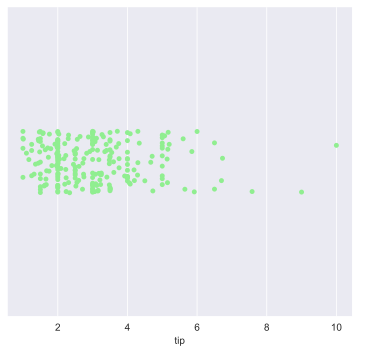

In [5]:
sns.set_style('darkgrid')

sns.catplot(data=tips, x='tip', 
            color='lightgreen');

Неоднократно использовали функцию `sns.set_style()` для установки цвета фона и отображения линий сетки координат, при этом используя параметры по умолчанию. Однако, эта функция также предоставляет возможность пользователям настраивать графики по своему усмотрению. Например, с её помощью можно изменить цвет фона графика, стиль и цвет линий сетки координат. Рассмотрим это на примере:

In [7]:
sns.set_style('darkgrid', {'grid.color': 'lightgrey', 
                           'grid.linestyle': ':', 
                           'axes.facecolor': 'Ivory'})

В данном коде ключ словаря `'grid.color'` задаёт цвет линий координатной сетки (светло-серый), `'grid.linestyle'` - тип линий сетки координат (точки) и `'axes.facecolor'` - цвет фона графика (Ivory).

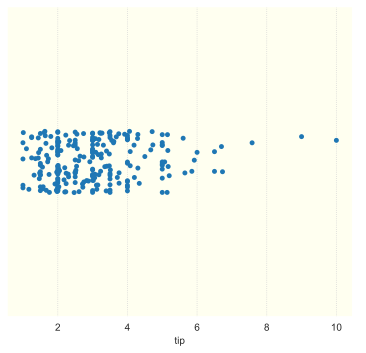

In [8]:
sns.catplot(data=tips, x='tip');

Итак, продолжим работу с функцией `sns.catplot()`. По умолчанию рисуется график stripplot. Параметр `kind` позволяет выбирать один из восьми типов диаграмм: `'strip'`, `'swarm'`, `'box'`, `'violin'`, `'boxen'`, `'point'`, `'bar'` и `'count'`.  Для примера построим несколько вариантов.

`kind='box'`:

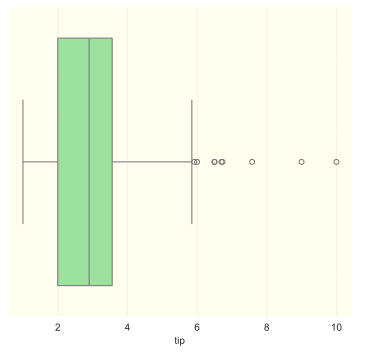

In [9]:
sns.catplot(data=tips, x='tip', 
            kind='box', color='lightgreen');

`kind='violin'`

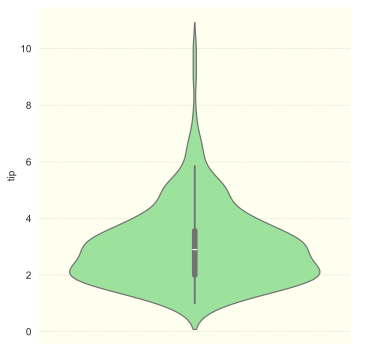

In [10]:
sns.catplot(data=tips, y='tip', 
            kind='violin', color='lightgreen');

График `boxenplot` зависисмости величины чаевых от дня недели и пола клиента:

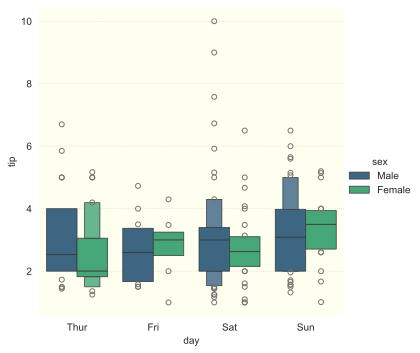

In [11]:
sns.catplot(data=tips, x='day', y='tip',
            palette='viridis',
            kind='boxen',
            hue='sex');

Этот же график, но в варианте исполнения pointplot:

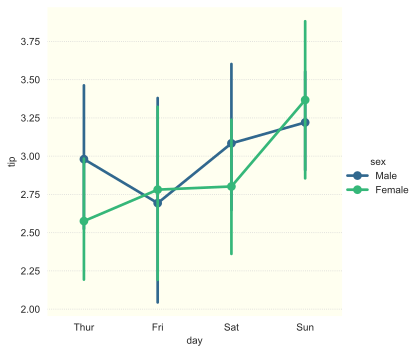

In [12]:
sns.catplot(data=tips, x='day', y='tip',
            palette='viridis',
            kind='point',
            hue='sex');

В данном случае устранить наложение линий можно, используя параметр `dodge`:

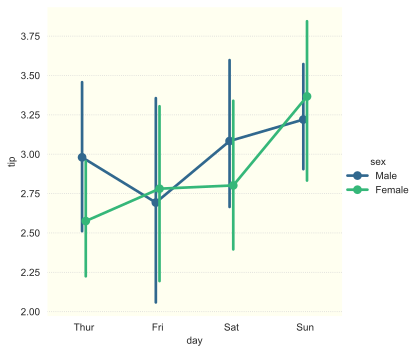

In [13]:
sns.catplot(data=tips, x='day', y='tip',
            palette='viridis',
            kind='point',
            hue='sex',
            dodge=True);

**Параметры col и row**

Параметры `col` и `row` функции `sns.catplot()` используются для создания сеток графиков. Как вы уже знаете, эти параметры позволяют создавать многоуровневые графики, где данные разделяются на подгруппы, которые отображаются в разных столбцах (col) или строках (row).

Давайте создадим график pointplot, который разобьём на подграфики в зависимости от времени посещения ресторана, для чего параметру `col` передадим значение `'time'`:

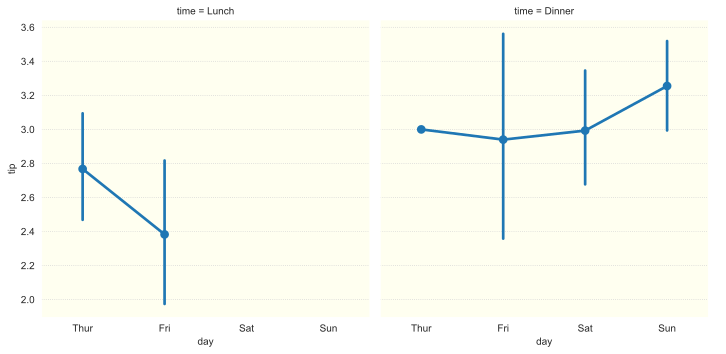

In [14]:
sns.catplot(data=tips, x='day', y='tip', 
            kind='point',
            col='time');

Если переменную `'time'` передадим параметру `row`, то подграфики отобразятся в виде строк:

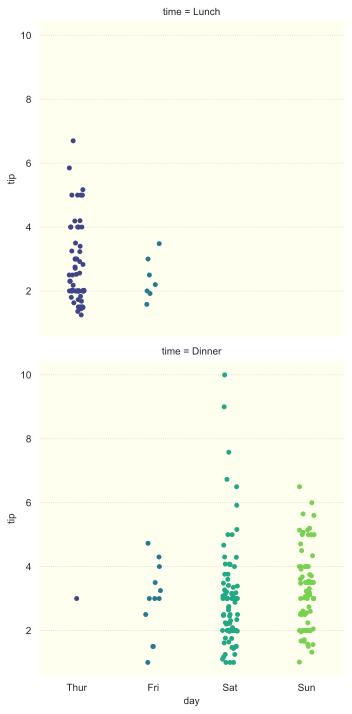

In [15]:
sns.catplot(data=tips, x='day', y='tip',
            hue='day',
            palette='viridis',
            kind='strip',
            row='time');

Если переменная, используемая для разбиения данных по столбцам, имеет множество значений, то можно воспользоваться параметром `aspect` для уменьшения ширины каждого подграфика:

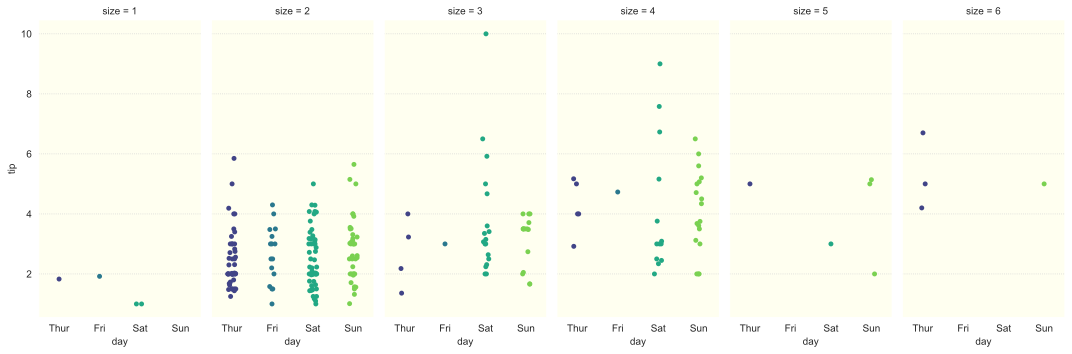

In [16]:
sns.catplot(data=tips, x='day', y='tip',
            hue='day',
            palette='viridis',
            kind='strip',
            col='size',
            aspect=0.5);

**Параметры col_order и row_order**

Параметр `col_order` позволяет выбирать порядок категорий для столбцов многопанельного графика, а параметр `row_order` - для строк многопанельного графика.

Для примера, на предыдущем графике, поменяем порядок отображения подграфиков на обратный:

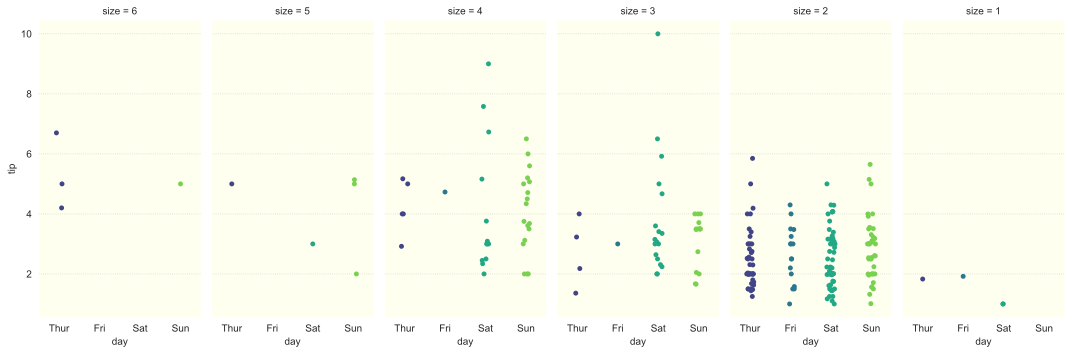

In [17]:
sns.catplot(data=tips, x='day', y='tip',
            hue='day',
            palette='viridis',
            kind='strip',
            col='size',
            aspect=0.5,
            col_order=[6,5,4,3,2,1]);

Также, для примера, посмотрим на совместное использование параметров `col`, `row` и `col_order`, `row_order`:

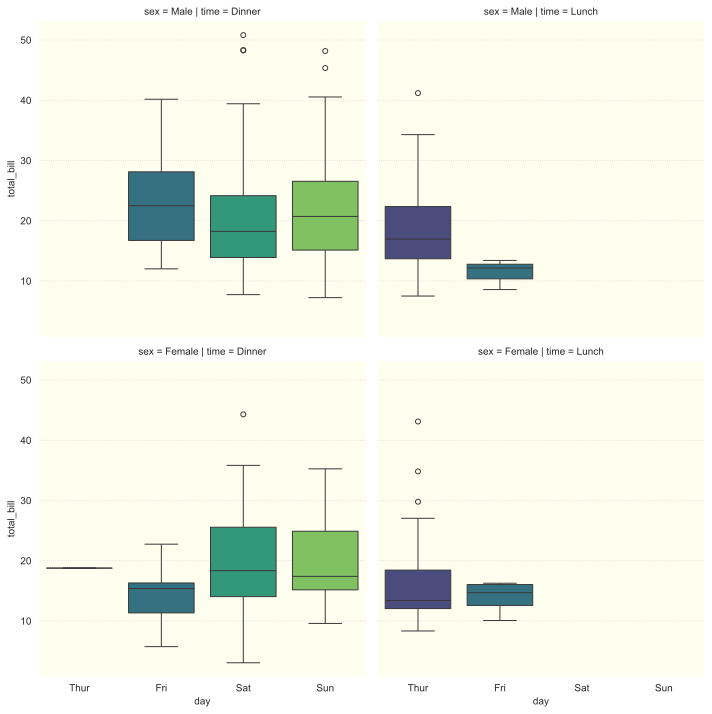

In [18]:
sns.catplot(data=tips, x='day', y='total_bill',
            palette='viridis',
            hue='day',
            kind='box',
            col='time', 
            col_order=['Dinner', 'Lunch'], 
            row='sex', 
            row_order=['Male', 'Female']);

**Параметр col_wrap**

Параметр `col_wrap` функции `sns.catplot()` определяет максимальное количество подграфиков в одной строке. Этот параметр используется, когда переменная, по которой происходит разбиение данных по столбцам, имеет много значений, и вы хотите, чтобы подграфики располагались в нескольких строках, а не в одной длинной строке.

Например, сделаем разбиение на подграфики по столбцу `'size'` и ограничим количество их количество на одной строке тремя штуками:

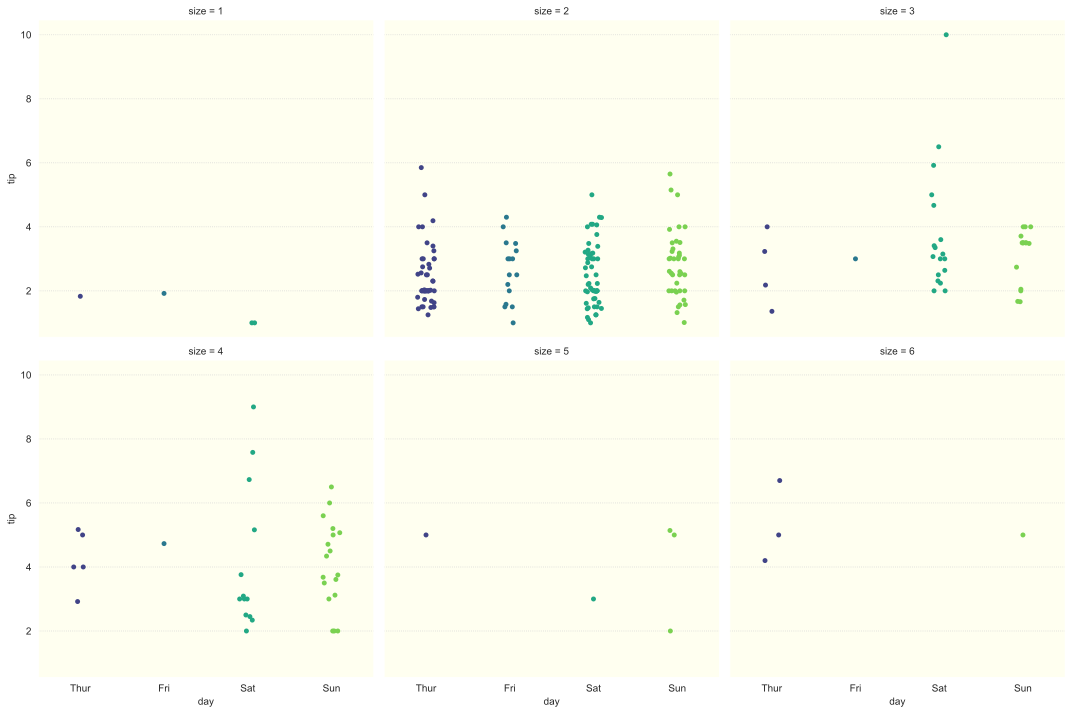

In [19]:
sns.catplot(data=tips, x='day', y='tip',
            hue='day',
            palette='viridis',
            kind='strip',
            col='size',
            col_wrap=3);

Или, например, построим countplot с максимальным отображением на каждой строке не более трёх подграфиков:

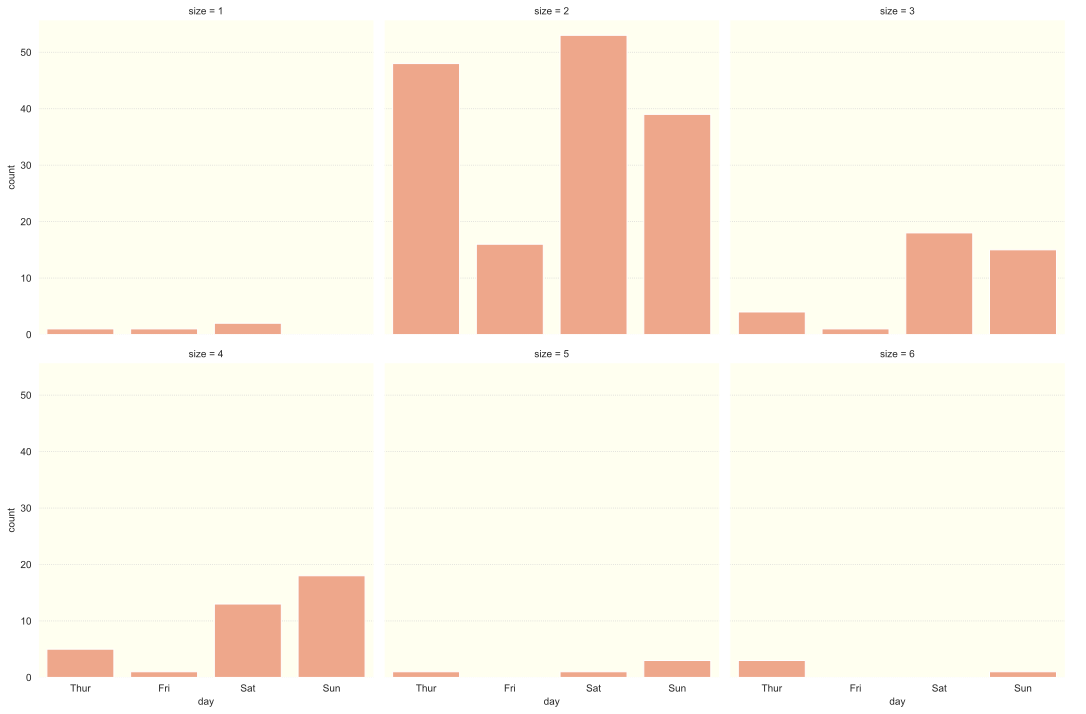

In [20]:
sns.catplot(data=tips, x='day',
            color='LightSalmon',
            kind='count',
            col='size',
            col_wrap=3);

Параметром `width` вы можете менять ширину столбцов на подграфиках. По умолчанию `width` принимает значение `0.8`. Например, сделаем ширину столбиков на подграфиках поуже, передав значение `0.5`:

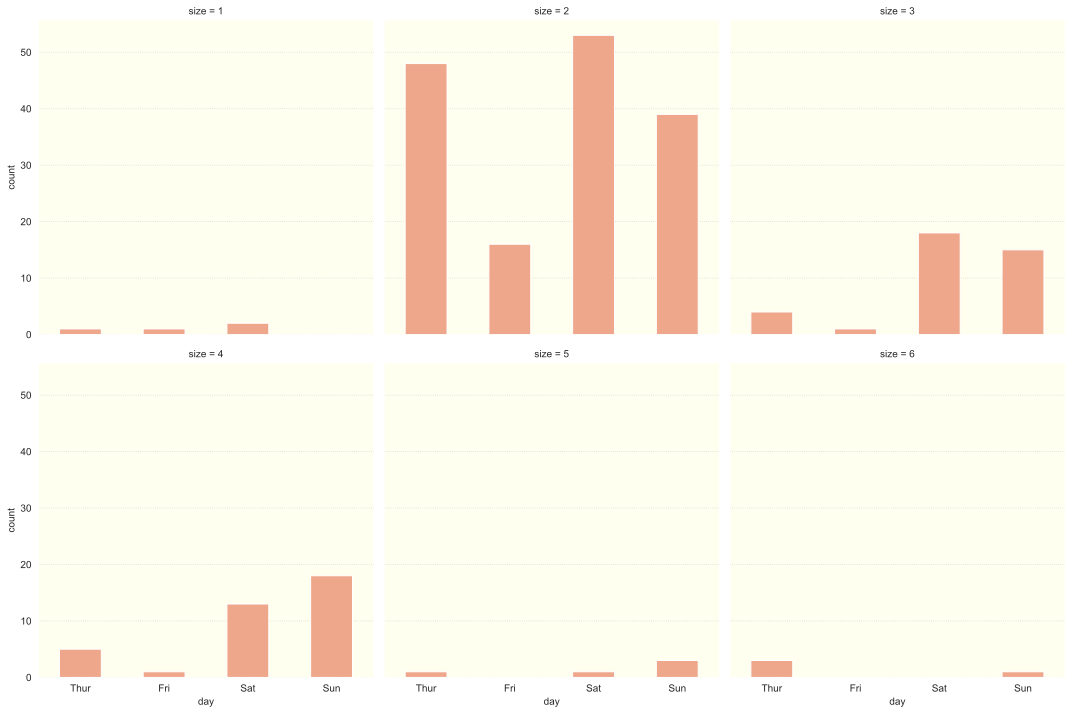

In [21]:
sns.catplot(data=tips, x='day',
            color='LightSalmon',
            kind='count',
            col='size',
            col_wrap=3,
            width=0.5);

Далее изменим стиль отображения графиков на белый с линиями сетки координат:

In [22]:
sns.set_style('whitegrid', {'grid.color': 'lightgrey', 
                            'grid.linestyle': ':'})

Построим диаграмму stripplot:

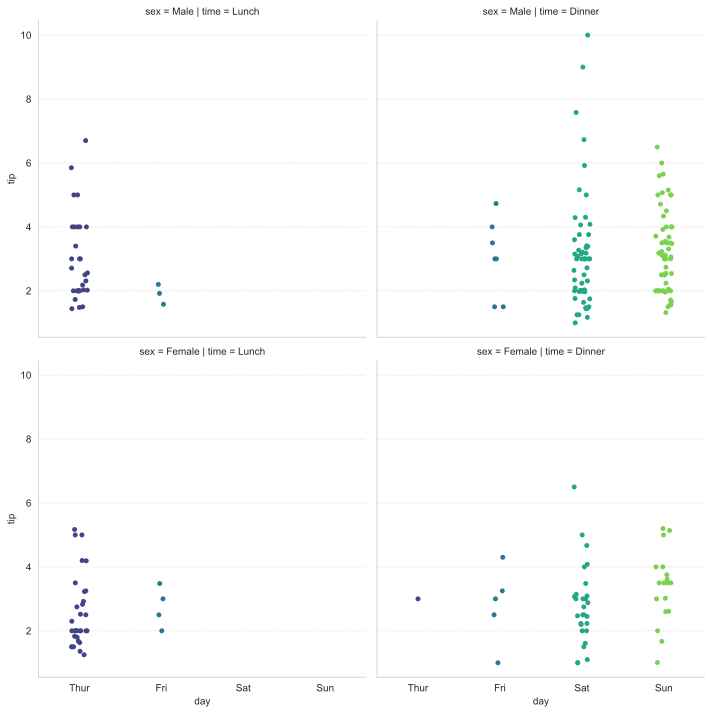

In [24]:
sns.catplot(data=tips, x='day', y='tip',
            hue='day',
            palette='viridis',
            col='time',
            row='sex');

Как видим, верхняя и правая границы каждого подграфика не отрисовываются. Если нужно, чтобы эти границы отрисовывались, то используем параметр `facet_kws`, которому следует передать словарь с ключом `'despine'` и значением для этого ключа `False`:

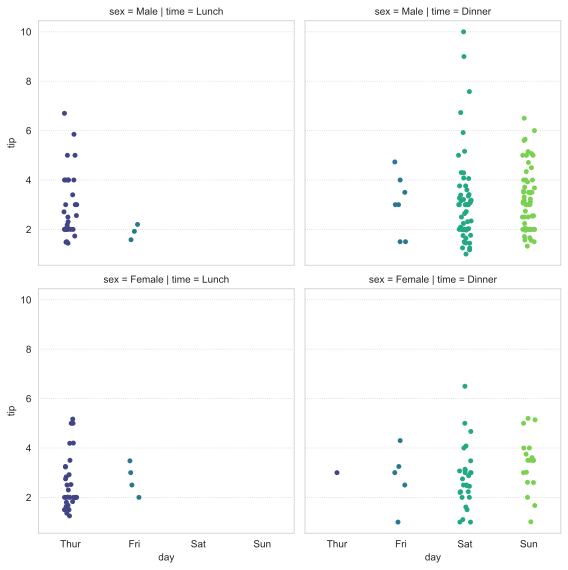

In [25]:
sns.catplot(data=tips, x='day', y='tip',
            hue='day',
            palette='viridis',
            col='time',
            row='sex',
            height=4,
            facet_kws={'despine': False});

Заодно мы уменьшили высоту каждого подграфика параметром `height=4`. Давайте еще уменьшим высоту каждого подграфика:

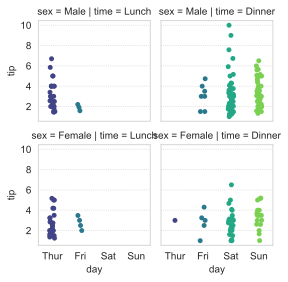

In [26]:
sns.catplot(data=tips, x='day', y='tip',
            hue='day',
            palette='viridis',
            col='time',
            row='sex',
            height=2,
            facet_kws={'despine': False});

И в данном случае мы сталкиваемся с проблемой наложения заголовков подграфиков друг на друга. Избавиться от этой проблемы можно двумя способами. Первый - это увеличить ширину подграфиков, используя параметр `aspect`:

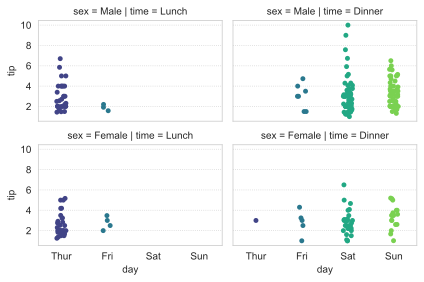

In [27]:
sns.catplot(data=tips, x='day', y='tip',
            hue='day',
            palette='viridis',
            col='time',
            row='sex',
            height=2,
            aspect=1.5,
            facet_kws={'despine': False});

Второй способ - использовать параметр `margin_titles`, который разнесёт заголовки по разным осям:

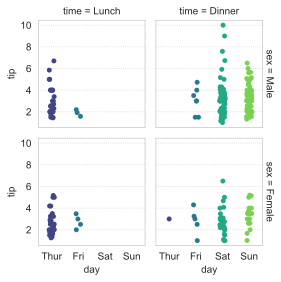

In [28]:
sns.catplot(data=tips, x='day', y='tip',
            hue='day',
            palette='viridis',
            col='time',
            row='sex',
            height=2,
            facet_kws={'despine': False},
            margin_titles=True);

**Параметры sharex и sharey**

Параметр `sharex` позволяет разделить ось X между несколькими подграфиками (по умолчанию `sharex=True`);

Параметр `sharex` позволяет задать, должны ли подграфики использовать одну и ту же шкалу по оси `X`. Когда `sharex=True` (по умолчанию), то каждый столбец подграфиков будет иметь одинаковую шкалу X.

`sharex=True`:

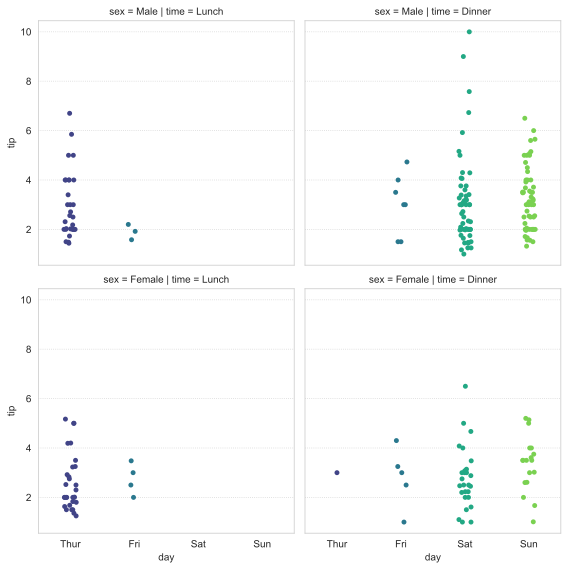

In [29]:
sns.catplot(data=tips, x='day', y='tip',
            hue='day',
            palette='viridis',
            col='time',
            row='sex',
            height=4,
            facet_kws={'despine': False});

`sharex=False`:

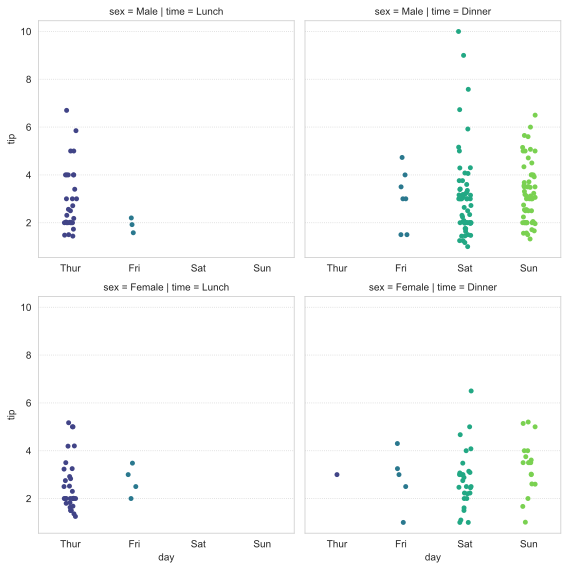

In [30]:
sns.catplot(data=tips, x='day', y='tip',
            hue='day',
            palette='viridis',
            col='time',
            row='sex',
            height=4,
            facet_kws={'despine': False},
            sharex=False);

Теперь каждый подграфик имеет "свои" подписи оси абсцисс. Так как в данном примере различий по оси X нет, то мы видим одинаковое отображение по осям абсцисс всех подграфиков.

Параметр `sharey` позволяет установить, будут ли подграфики использовать единую шкалу по оси Y. Если `sharey=True` (что является значением по умолчанию), то каждая строка подграфиков будет иметь одинаковую шкалу Y.

`sharey=False`:

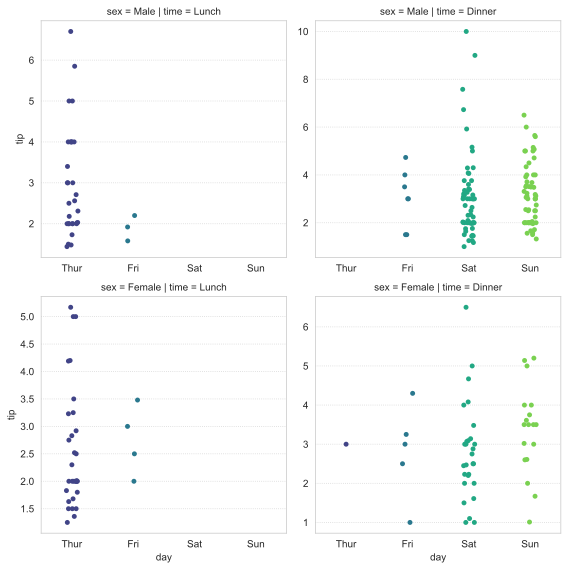

In [31]:
sns.catplot(data=tips, x='day', y='tip',
            hue='day',
            palette='viridis',
            col='time',
            row='sex',
            height=4,
            facet_kws={'despine': False},
            sharex=False,
            sharey=False);

Как можете заметить, теперь диаграмма имеет различные отображения размерностей осей ординат на каждом подграфике.

**Параметр size**

Для изменения размера точек на графике применяется параметр `size`

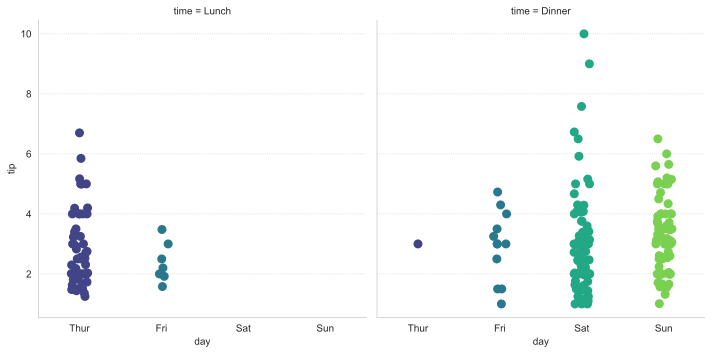

In [32]:
sns.catplot(data=tips, x='day', y='tip',
            hue='day',
            palette='viridis',
            col='time',
            size=9);

В данном случае, не лишним будет сделать точки полупрозрачными, используя параметр `alpha`

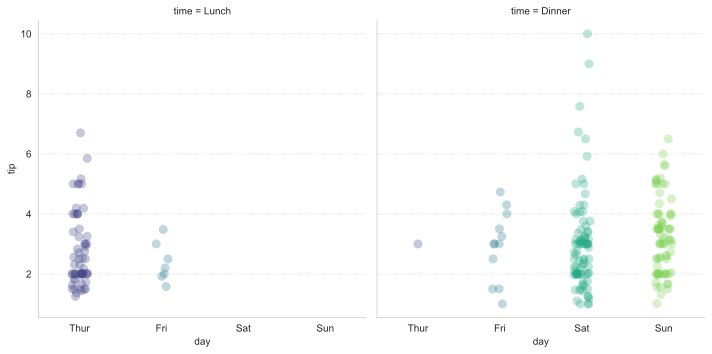

In [33]:
sns.catplot(data=tips, x='day', y='tip',
            hue='day',
            palette='viridis',
            col='time',
            size=9,
            alpha=0.3);

**Настройка заголовка, названий и меток осей координат**

Названиями заголовков и осей подграфиков в библиотеке *seaborn* позволяют управлять следующие методы: `set_titles()`, `set_axis_labels()`, `set_xticklabels()` и `set_yticklabels()`. Эти методы применяются к объектам, то есть мы сохраняем график как объект и к этому объекту применяем один из этих методов.

**Метод set_titles()**

Метод `set_titles()` библиотеки *seaborn* используется для настройки заголовков подграфиков при использовании функций, создающих сетку графиков. Этот метод позволяет изменять шаблон заголовков, их форматирование и текст, отображаемый на каждом подграфике.

Методу `set_titles()` передаётся строка, определяющая шаблон заголовка для каждого подграфика.

Например:

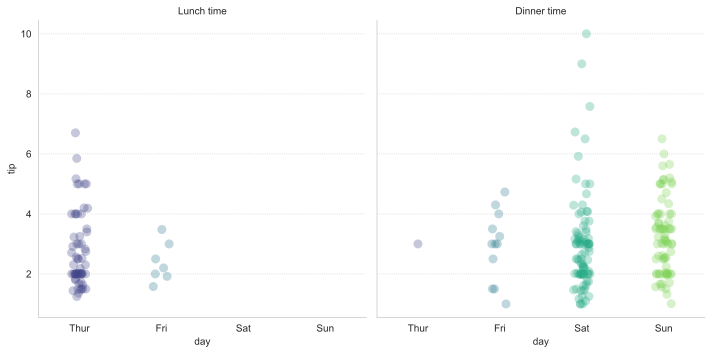

In [34]:
g = sns.catplot(data=tips, x='day', y='tip',
                hue='day',
                palette='viridis',
                col='time',
                size=9,
                alpha=0.3)

g.set_titles(('{col_name} {col_var}'));

`col_name`, `col_var`, `row_name`, `row_var` - это специальные зарезервированные слова, используемые в методе `set_titles()` класса **FacetGrid** библиотеки *seaborn* для вставки значений в заголовки подграфиков.

`col_name` / `row_name`: Это имя текущего значения переменной, по которой разбиваются данные на столбцы / строки. Например, если разбивка идет по переменной `'time'`, то `col_name` может принимать значения `'Lunch'` и `'Dinner'`.

`col_var` / `row_var`: Это имя переменной, по которой разбиваются данные на столбцы (то есть, название столбца данных) / строки. Например, если разбивка идет по переменной `'time'`, то `col_var` будет `'time'`.

При помощи метода `set_titles()` также можно менять размер шрифта, толщину, цвет заголовка. Например:

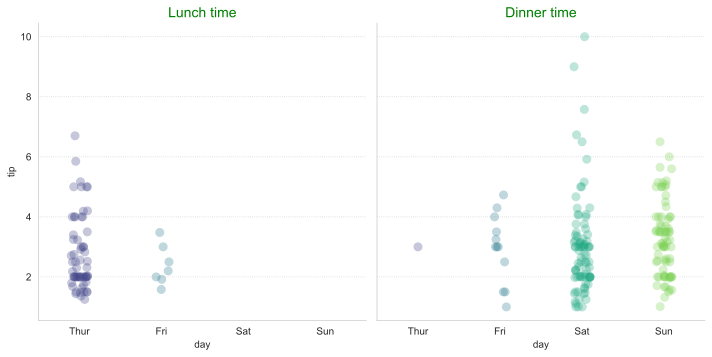

In [35]:
g = sns.catplot(data=tips, x='day', y='tip',
                hue='day',
                palette='viridis',
                kind='strip',
                col='time',
                size=9,
                alpha=0.3)

g.set_titles(('{col_name} {col_var}'), size=14, color='green');

Сделаем шрифт заголовка жирным, передав методу `set_titles()` параметр `weight='bold'`:

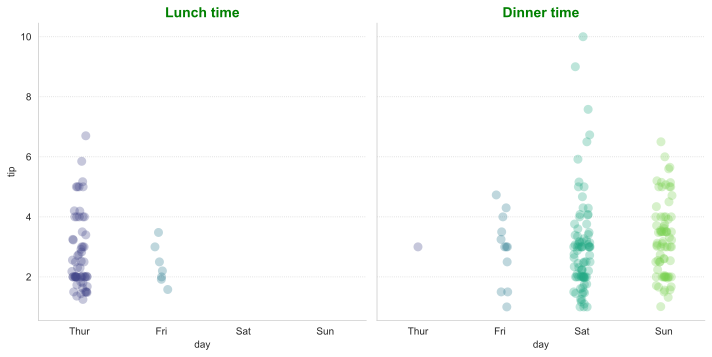

In [36]:
g = sns.catplot(data=tips, x='day', y='tip',
                hue='day',
                palette='viridis',
                kind='strip',
                col='time',
                size=9,
                alpha=0.3)

g.set_titles(('{col_name} {col_var}'), size=14, color='green', weight='bold');

Вариант использования метода `set_titles()` со столбцами и строками:

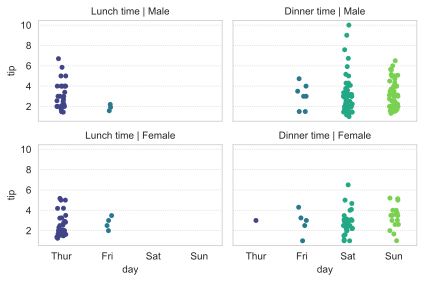

In [37]:
g = sns.catplot(data=tips, x='day', y='tip',
                hue='day',
                palette='viridis',
                col='time',
                row='sex',
                height=2,
                aspect=1.5,
                facet_kws={'despine': False})
g.set_titles(('{col_name} {col_var} | {row_name}'));

**Метод set_axis_labels()**

Метод `set_axis_labels()` в библиотеке *seaborn* используется для установки меток осей (X и Y) на графиках, созданных с помощью классов **FacetGrid**, **PairGrid** и их производных. Этот метод позволяет добавлять или изменять метки осей на всех подграфиках одновременно, что упрощает процесс настройки и улучшает читаемость графиков.

Параметры:
- `x_var`: строка с названием для оси X. Если указано None, метка не будет изменена;
- `y_var`: строка с названием для оси Y. Если указано None, метка не будет изменена.

Например, не будем отражать наименование day по оси абсцисс, а имя оси ординат изменим с tip на Tip:

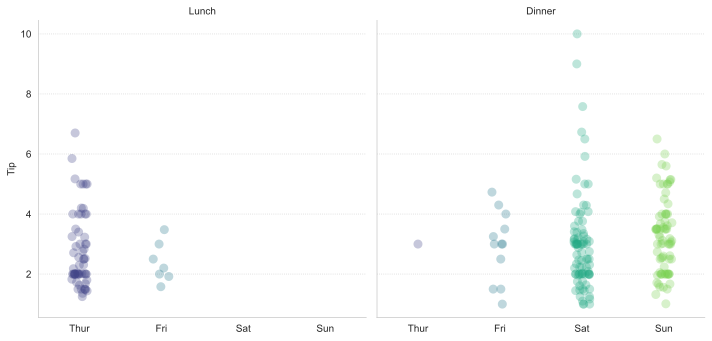

In [38]:
g = sns.catplot(data=tips, x='day', y='tip',
                hue='day',
                palette='viridis',
                kind='strip',
                col='time',
                size=9,
                alpha=0.3)

g.set_titles(('{col_name}'))
g.set_axis_labels(x_var='', y_var='Tip');

**Методы set_xticklabels() и set_yticklabels()**

Методы `set_xticklabels()` и `set_yticklabels()` в библиотеке *seaborn* используются для настройки меток осей X и Y, соответственно.

Для примера поменяем метки по оси абсцисс с сокращенных наименований на полные:

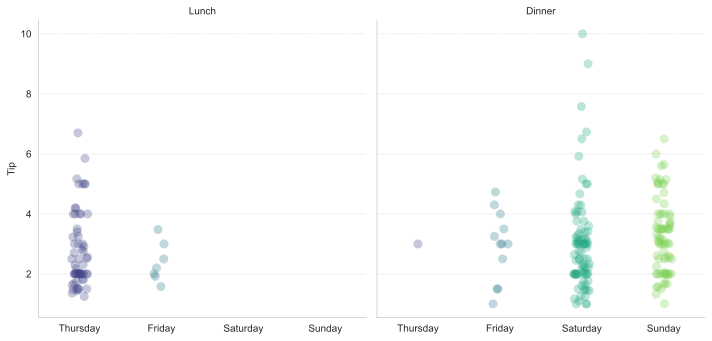

In [39]:
g = sns.catplot(data=tips, x='day', y='tip',
                hue='day',
                palette='viridis',
                col='time',
                size=9,
                alpha=0.3)

g.set_titles(('{col_name}'))
g.set_axis_labels('', 'Tip')
g.set_xticklabels(['Thursday', 'Friday', 'Saturday', 'Sunday']);